In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [8]:
# Load data and remove NaNs
auto = pd.read_csv('../Labs 5.3.2/Data/Auto.csv', na_values='?').dropna()

# Show the first 5 rows of the data
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


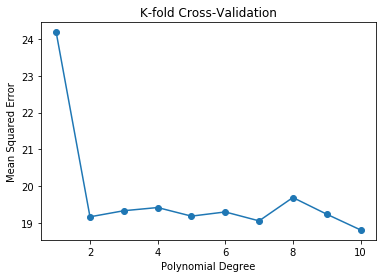

In [28]:
# Create a K-fold (with K = 10) cross-validation generator
kf = KFold(n_splits=10, shuffle=True)


# Make a ordinary linear regression object
regr = skl_lm.LinearRegression()

# Make a list for storing cross validation scores (mean squared errors)
scores = list()

# Make a list of polynomial orders (from 1 to 10)
p_order = np.arange(1,11)

# Iterate through the different polynomial orders
for i in p_order:
    # Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to i
    poly = PolynomialFeatures(i)
    
    # Convert the data into a feature matrix [[1, x1, x1^2, ...],
    #                                         [1, x2, x2^2, ...],
    #                                                       ...]
    X_poly = poly.fit_transform(auto.horsepower.values.reshape(-1,1))
    
    # Calculate the mean squared error via cross validation (using the LeaveOneOut() object)
    score = cross_val_score(regr, X_poly, y=auto.mpg, cv=kf, scoring='neg_mean_squared_error').mean()
    scores.append(-score)

# Plot the MSE vs. polynomial degree
plt.plot(p_order,scores,'-o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.savefig('K_fold.png', dpi=200)
plt.title('K-fold Cross-Validation')